# WEIGHT ATTENUATION OF RIDGE REGRESSION

In this notebook we will fit single feature ridge models having different lambda values and investigate how the model fits (straight lines) are affected by lambda parameter. We will see how ridge regression attenuates weights.

**Add the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import statements**

In [2]:
import pandas as pd
from m_learn.linear_model import ridge_regression
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

**Load and split the data**

In [3]:
data = pd.read_csv('./../../data/house_prices/train.csv')
# train test split
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 0)

## 1. Investigate affect of l2 regularization on weight of single feature classifier

### 1.1 Extract X y data

**Feature and output of the model**

In [4]:
feature = ['GrLivArea']
output = 'SalePrice'

**Get X y data for train and test set**

In [5]:
(X_train, y_train) = get_xy_data(train_data, feature, output)
(X_test, y_test) = get_xy_data(test_data, feature, output)

### 1.2 Plots of fits of models having different l2 regularization penalties

**Model parameters**

In [6]:
step_size = 1e-12
max_iterations=1000

**L2 penalties chosen for investigation**

In [7]:
l2_penalties = [1e7,1e9, 1e10, 1.5e10, 2e10,1e11, 1.5e11, 2e11]

**Iterate through each l2 penalty/lambda value, create model using the lambda value and then plot a fit of the model**

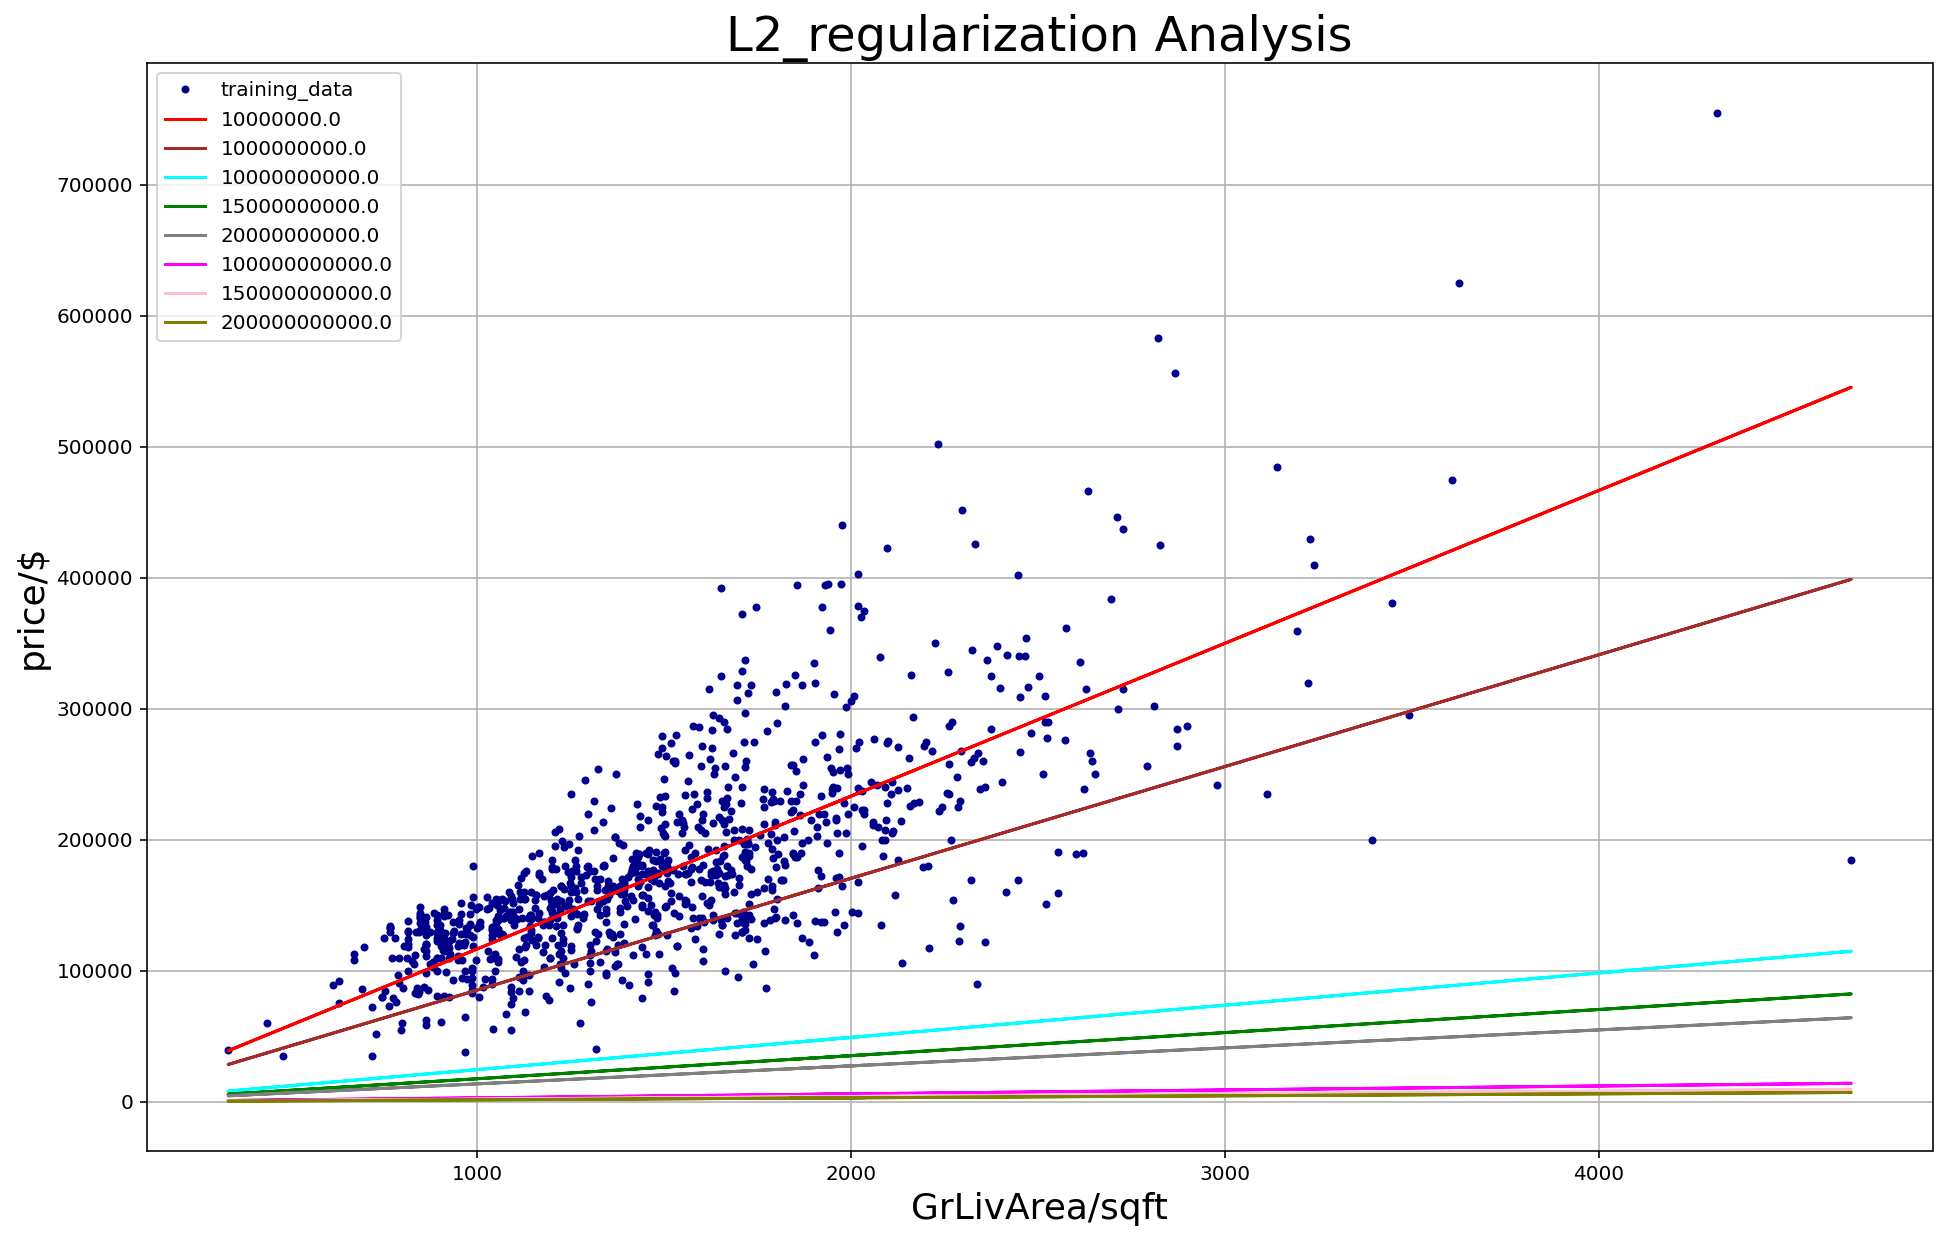

In [8]:
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)

# a list to store the RSS values of the different models
RSS = []
# create a scatter plot of the training data
plt.plot(train_data[feature], train_data[output], '.', color = "darkblue")
# colors of different plots
colors = ["red", "brown","cyan","green","grey","magenta","pink","olive"]

# iterate through each l2 penalty
for i, penalty in enumerate(l2_penalties):
    # create a ridge regression model using the given l2 penalty value
    model = ridge_regression(penalty)    
    # fit the ridge regression model 
    model.fit(X_train, y_train, step_size,maximum_iterations = max_iterations)
    # create a line plot of the model fit
    plt.plot(train_data[feature], model.predict(X_train), '-',c = colors[i])
    # compute the test RSS of the model fit
    rss = model.rss(X_test, y_test)
    # append the RSS to the designated list
    RSS.append(rss)

# add the legend, x & y labels, grid and title to the plot             
plt.legend(["training_data"]+l2_penalties)                 
plt.xlabel("GrLivArea/sqft", fontsize = 18)
plt.ylabel("price/$", fontsize = 18)
plt.grid()
plt.title("L2_regularization Analysis", fontsize = 24)             
plt.show()

### 1.3 Plot of CV Error vs Log of L2 Penalty

`What does cross validation error mean?`: One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or test set). Cross validation error is the error calculated on the other subset.

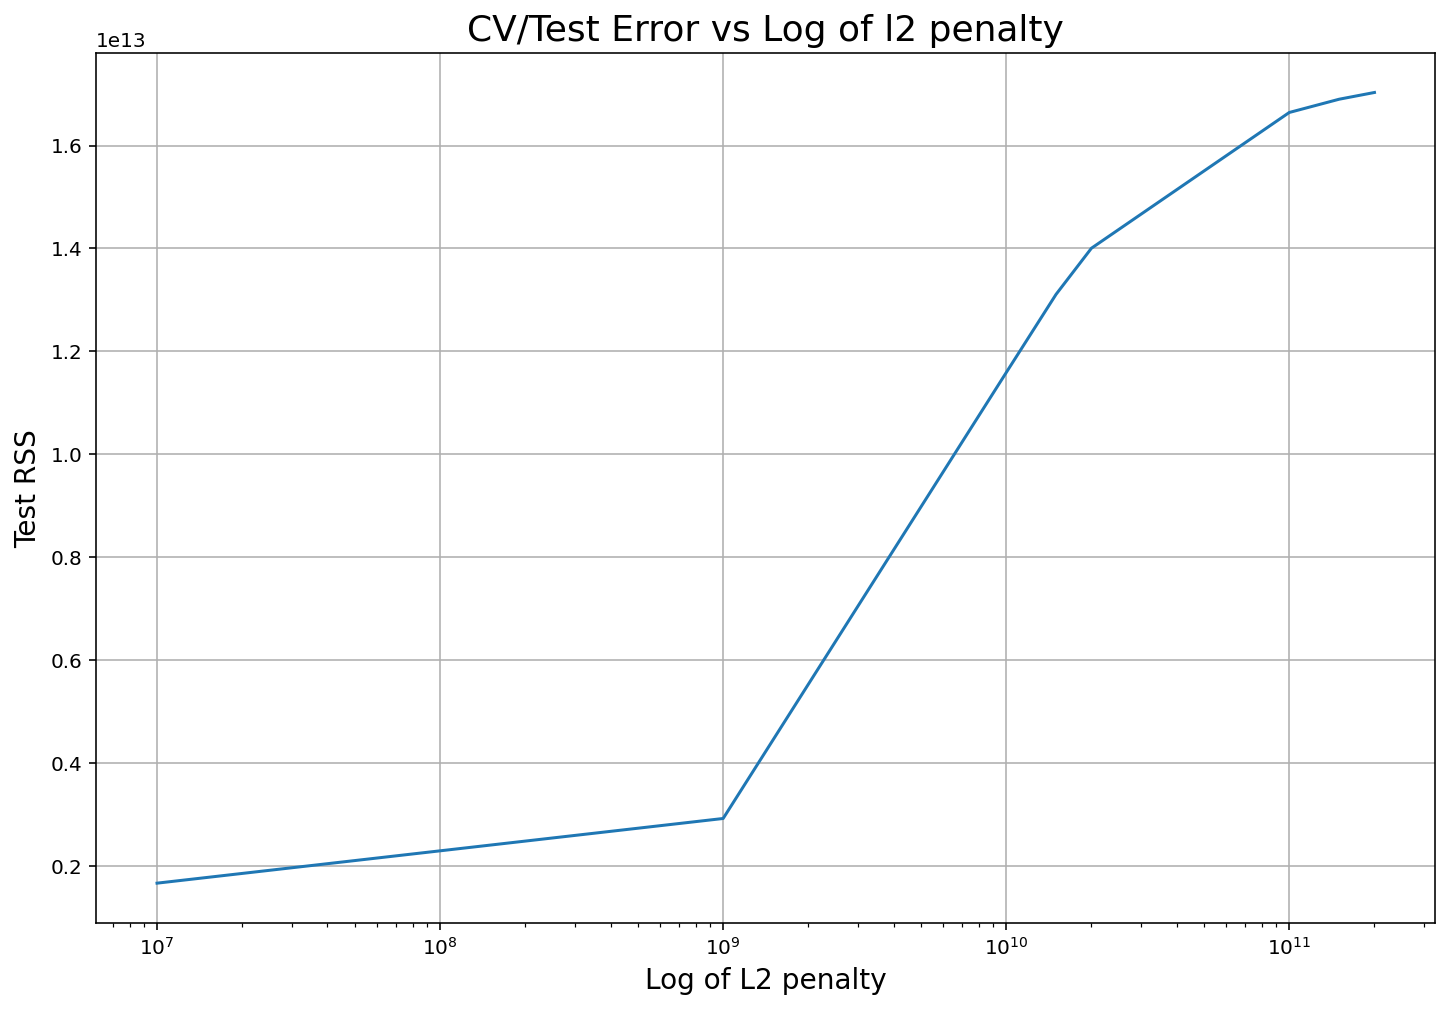

In [9]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# create a logarithmic plot of cross-validation/test error vs l2 penalties
plt.plot(l2_penalties,RSS)
plt.xscale('log')
plt.xlabel('Log of L2 penalty',fontsize = 14)
plt.ylabel('Test RSS',fontsize = 14) 
plt.title('CV/Test Error vs Log of l2 penalty', fontsize = 18)
plt.grid()
plt.show()